In [1]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from astropy.visualization import ImageNormalize

In [ ]:
# cd data_reduction_codes
# python sort_observations.py --dir /Users/bencapistrant/RETRHO/2024-05-31

# python image_reduction.py --light /Users/bencapistrant/RETRHO/2024-05-31/Light/M20 --dark /Users/bencapistrant/RETRHO/2024-05-31/Dark --flat /Users/bencapistrant/RETRHO/2024-05-31/Flat --bias /Users/bencapistrant/RETRHO/2024-05-31/Bias --output /Users/bencapistrant/RETRHO/2024-05-31/


In [45]:
# path = '/Users/bencapistrant/RETRHO/CTO_M81/'
path = '/Users/bencapistrant/RETRHO/4-13-2025/'
# path = '/Users/bencapistrant/RETRHO/2024-05-31/'
# path = '/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/'
# path = '/Users/bencapistrant/RETRHO/4-10-2025/'

In [48]:
bias_files

['/Users/bencapistrant/RETRHO/4-13-2025/Bias/darks_04102025.2025-04-11.0364.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Bias/darks_04102025.2025-04-11.0365.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Bias/darks_04102025.2025-04-11.0366.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Bias/darks_04102025.2025-04-11.0367.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Bias/darks_04102025.2025-04-11.0368.fits']

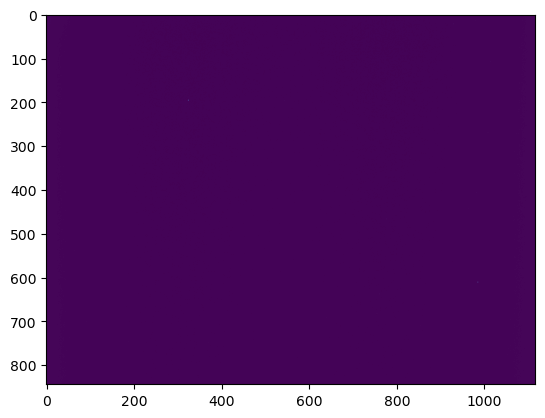

In [47]:
bias_files = sorted(glob.glob(path+'Bias/*'))
master_bias = np.median([fits.getdata(f) for f in bias_files],axis=0)
plt.imshow(master_bias)

In [49]:
from collections import defaultdict
darks = sorted(glob.glob(path+'Dark/*'))


def get_exposure_time(filename):
    return fits.getheader(filename)['EXPTIME']

# Group dark frames by exposure time
dark_groups = defaultdict(list)
for dark in darks:
    exposure_time = get_exposure_time(dark)
    if exposure_time is not None:
        dark_groups[exposure_time].append(dark)

# Combine dark frames for each exposure time
master_darks = {}
for exposure_time, darks in dark_groups.items():
    # print(dark_groups)
    # dark_dat = [fits.getdata(f).astype(float) for f in darks]
    dark_dat = [fits.getdata(f).astype(float)-master_bias for f in darks]
    # md = np.median(dark_dat, axis=0)
    # print(md)
    master_darks[exposure_time] = np.median(dark_dat, axis=0)


In [50]:
dark_groups

defaultdict(list,
            {180.0: ['/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0329.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0330.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0331.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0332.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0333.fits'],
             25.0: ['/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0334.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0335.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0336.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0337.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/Dark/darks_04102025.2025-04-11.0338.fits',
        

In [51]:
master_darks

{180.0: array([[ 430.,  523.,  399., ...,  183.,  162.,  134.],
        [ 390.,  404.,  417., ...,  121.,  263.,  233.],
        [ 405.,  418.,  468., ...,  212.,  292., 9201.],
        ...,
        [ 156.,  170.,  207., ...,  451.,  193.,  161.],
        [ 206.,  127.,  239., ...,  190.,  159.,  166.],
        [ 209.,  197.,  207., ...,  158.,  178.,  190.]]),
 25.0: array([[ 423.5,  437.5,  318. , ...,    5. ,   37.5,  -23.5],
        [ 355. ,  317.5,  336.5, ...,   89.5,   99. ,   73.5],
        [ 386. ,  394.5,  285. , ...,   60. ,  126.5, 1606.5],
        ...,
        [  51.5,   87.5,   20. , ...,   81. ,   54.5,   16. ],
        [  34. ,   10.5,   73.5, ...,   73. ,   53. ,   19.5],
        [  52.5,   88. ,   73.5, ...,   13. ,   80. ,   21. ]]),
 0.2: array([[ 46. , 116. ,  -8.5, ...,  -3. ,  16.5, -18.5],
        [ 31.5,  36.5,  18.5, ...,  39. ,  87. ,   3.5],
        [ 55.5,  62. ,  19.5, ...,  84. , 104.5, -33.5],
        ...,
        [  4. ,  23. , -53. , ...,  59. ,  56.5,

In [52]:
print(master_darks[0.005].min(), master_darks[0.005].max())


-149.0 10813.0


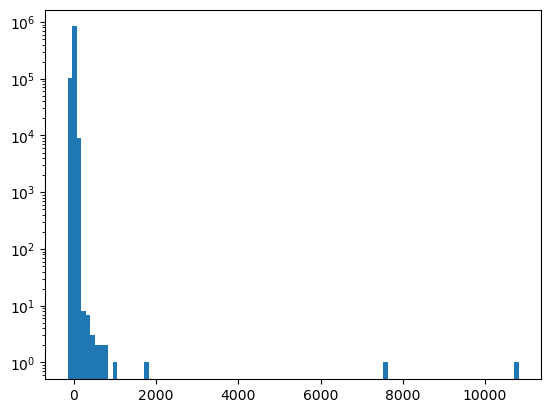

In [53]:
plt.hist(master_darks[0.005].flatten(), bins=100,log=True);

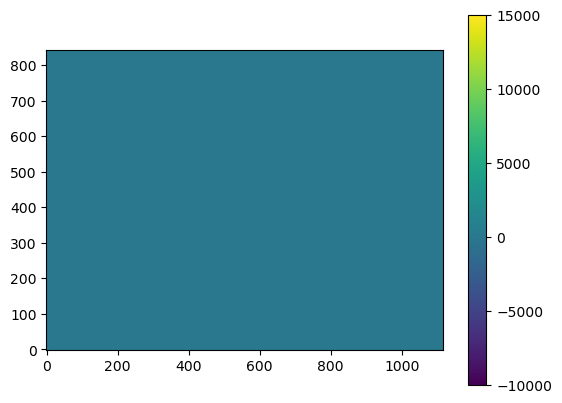

In [54]:
plt.imshow(master_darks[0.005],origin='lower',vmin=-10000,vmax=15000)
plt.colorbar()

In [55]:
flat_files = sorted(glob.glob(path+'Flat/*'))
# flat_files = sorted(glob.glob(path+'Flat2/*'))
# flat_files = sorted(glob.glob('/Users/bencapistrant/RETRHO/2024-05-31/Flat/*'))
flat_files 

['/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0021.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0022.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0023.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0024.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0025.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0026.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0027.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0028.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0029.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_b.2025-04-10.0030.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_g.2025-04-10.0051.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_g.2025-04-10.0052.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_g.2025-04-10.0053.fits',
 '/Users/bencapistrant/RE

In [56]:
flat_files[-15]

'/Users/bencapistrant/RETRHO/4-13-2025/Flat/flat_z.2025-04-10.0006.fits'

In [14]:
fits.getheader(flat_files[-20])

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4144 / length of data axis 1                          
NAXIS2  =                 2822 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / physical = BZERO + BSCALE*array_value          
BSCALE  =                    1 / physical = BZERO + BSCALE*array_value          
XBINNING=                    2 / Binning factor in width                        
YBINNING=                    2 / Binning factor in height                       
EXPOINUS=              40000

In [471]:
master_darks.keys()


dict_keys([180.0, 25.0, 0.2, 0.005])

In [ ]:
gits.getheade

In [67]:
def get_filter(filename): 
    return fits.getheader(filename)['FILTER']

# def get_filter(filename):
#     parts = filename.split('_')
#     for part in parts:
#         if 'filter-' in part:
#             return part.replace('filter-', '')
#     return None

flat_groups = defaultdict(list)
for f in flat_files:
    filter_name = get_filter(f)
    if filter_name is not None:
        flat_groups[filter_name].append(f)

master_flats = {}
for filter_name, flats in flat_groups.items():
    expt = get_exposure_time(flats[0])
    # flat_dat = [fits.getdata(f).astype(float) -master_bias- master_darks[0.2] for f in flats]
    flat_dat = [fits.getdata(f).astype(float) -master_bias- master_darks[expt] for f in flats]
    # flat_dat = [fits.getdata(f).astype(float) - master_darks[expt] for f in flats]
    # if expt!=4:
        # flat_dat = [fits.getdata(f).astype(float) - master_bias - master_darks[expt] for f in flats]
    # else:
        # flat_dat = [fits.getdata(f).astype(float) - master_bias -  (4/3)*master_darks[3] for f in flats]
    flat = np.mean(flat_dat, axis=0)
    master_flats[filter_name] = flat/np.median(flat)

In [59]:
# M20_files = sorted(glob.glob(path+'M81/*'))
M20_files = sorted(glob.glob(path+'M51/*'))
M20_files

['/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0061.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0062.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0063.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0064.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0069.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0070.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0071.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0072.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0073.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0074.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0075.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0076.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0077.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0078.fits',
 '/Use

In [60]:
len(M20_files)

20

In [61]:
import ipywidgets as widgets
from IPython.display import display
from astropy.visualization import ZScaleInterval

# crab = sorted(glob.glob('Crab/*filter-B*.fit'))
# crab = crab_groups['I']
files = M20_files
# Create a dropdown to select the image index
# image_selector = widgets.Dropdown(
#     options=list(range(len(files))),
#     description='Image Index:',
#     disabled=False,
# )

next_button = widgets.Button(
    description='Next Image',
    disabled=False,
    button_style='primary',
    tooltip='Go to the next image',
)

# Create a button to remove the selected image
remove_button = widgets.Button(
    description='Remove Image',
    disabled=False,
    button_style='danger',
    tooltip='Remove the selected image from the list',
)

# Create an output widget to display the image
output = widgets.Output()
# Initialize the current image index
current_index = 0

def display_image():
    with output:
        output.clear_output()
        frame = fits.getdata(files[current_index])
        plt.figure(figsize=(10, 10))
        plt.imshow(frame, origin='lower', norm=ImageNormalize(frame, ZScaleInterval()))
        plt.title(f"Index {current_index}")
        plt.show()

def next_image(b):
    global current_index
    current_index = (current_index + 1) % len(files)  # Loop back to the start if at the end
    display_image()

# Attach the function to the button
next_button.on_click(next_image)

# Display the widgets
# display(next_button, output)

# Display the initial image
# display_image()

# def display_image(change):
#     with output:
#         output.clear_output()
#         idx = image_selector.value
#         # filter = get_filter(crab[idx])
#         frame = fits.getdata(files[idx])
#         plt.figure(figsize=(10,10))
#         plt.imshow(frame, origin='lower', norm=ImageNormalize(frame, ZScaleInterval()))
#         plt.title(f"Index {idx}")
#         plt.show()

def remove_image(b):
    idx = current_index
    files.pop(idx)
    display_image()

# Attach the functions to the widgets
# image_selector.observe(display_image, names='value')
remove_button.on_click(remove_image)

# Display the widgets
display(next_button, remove_button, output)

# Display the initial image
display_image()

Button(button_style='primary', description='Next Image', style=ButtonStyle(), tooltip='Go to the next image')

Button(button_style='danger', description='Remove Image', style=ButtonStyle(), tooltip='Remove the selected im…

Output()

In [62]:
len(files)

17

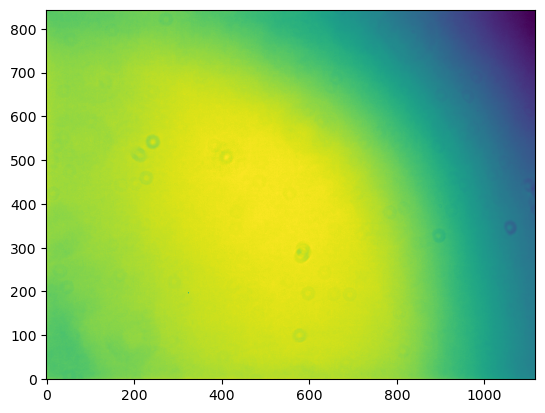

In [76]:
plt.imshow(master_flats['B'],origin='lower',norm=ImageNormalize(master_flats['B'], ZScaleInterval()))

In [68]:
def calib(file):
    expt = get_exposure_time(file)
    f = get_filter(file)
    # if expt == 25:
        # expt = 30
    # print(f'Calibrating {file} with filter {f} and exposure time {expt} s')
    frame = (fits.getdata(file) -master_bias-master_darks[expt])/master_flats[f]
    # frame = (fits.getdata(file) -master_bias-master_darks[expt])/master_flats[f]
    # frame = (fits.getdata(file) -master_darks[expt])/master_flats[f]
    # frame = (fits.getdata(file) -master_bias.data-master_darks[25].data)/nmfv
    return frame

In [323]:
files2 = files

In [366]:
files

['/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0061.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0062.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0069.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0070.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0071.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0072.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0073.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0074.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0075.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0076.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0077.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0078.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0079.fits',
 '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0080.fits',
 '/Use

In [69]:

groups = defaultdict(list)
for im in files:
    filter_name = get_filter(im)
    if filter_name is not None:
        groups[filter_name].append(im)

M20_calib = {}
for filter_name, fs in groups.items():
    # if filter_name !='B':
        
    reduced = [calib(f) for f in fs]
    # master = np.median(reduced, axis=0)
    M20_calib[filter_name] = reduced
    

In [70]:
groups

defaultdict(list,
            {'B': ['/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0061.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0062.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0084.fits'],
             'G': ['/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0069.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0070.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0082.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0083.fits'],
             'R': ['/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0071.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0072.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0073.fits',
              '/Users/bencapistrant/RETRHO/4-13-2025/M51/M51.2025-04-10.0074.fits',
              '/Users/bencapistrant/RETRH

In [460]:
fits.getheader(files[0])['Filter']

'B'

In [461]:
(fits.getdata(files[0])-master_darks[180])/master_flats['B']

array([[1561.58529636, 1444.4601822 , 1507.86423886, ..., 1606.14123761,
        1797.19093184, 1570.30302958],
       [1561.10233939, 1493.38468281, 1528.04834365, ..., 1631.57997243,
        1725.18460667, 1529.93386953],
       [1576.14993299, 1574.81359928, 1631.82732273, ..., 1789.35695396,
        1686.56726641, 1442.84272815],
       ...,
       [1695.75222365, 1617.46573588, 1734.19039668, ..., 2627.72255068,
        2530.27130283, 2717.18036972],
       [1697.02773146, 1547.15183065, 1650.35494733, ..., 2718.61812347,
        2889.24438465, 2508.94600094],
       [1531.02108434, 1629.46662836, 1827.62530814, ..., 2432.37327144,
        2673.92246696, 2703.78963151]])

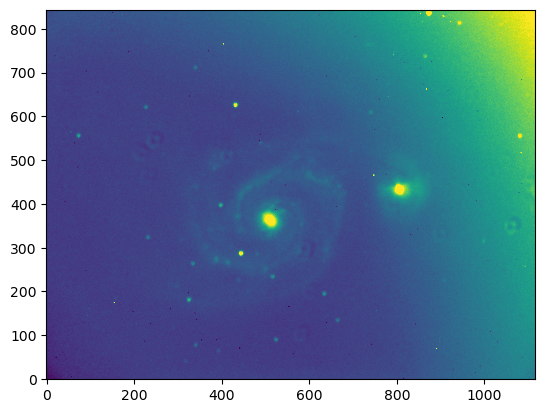

In [71]:
plt.imshow(M20_calib['R'][0],origin='lower',norm=ImageNormalize(M20_calib['R'][0], ZScaleInterval()))

In [246]:
# M20_calib = [calib(f) for f in files]

In [25]:
from tqdm import tqdm
import astroalign as aa

In [40]:
M20_calib.keys()

dict_keys(['B', 'R', 'V'])

  0%|          | 0/4 [00:00<?, ?it/s]

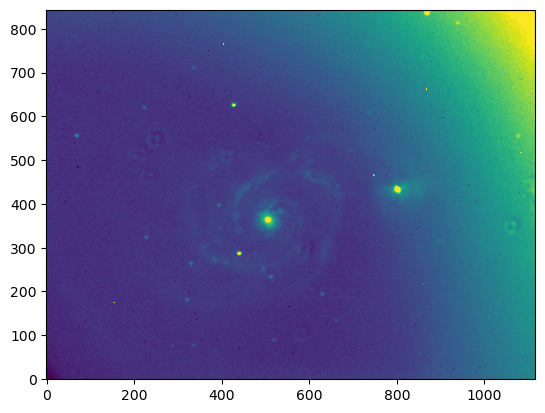

 25%|██▌       | 1/4 [00:00<00:01,  2.65it/s]

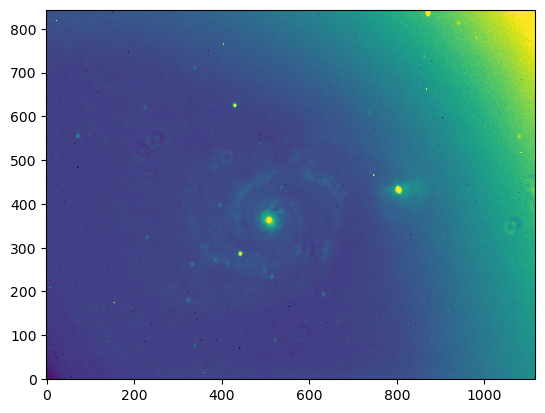

 50%|█████     | 2/4 [00:00<00:00,  2.36it/s]

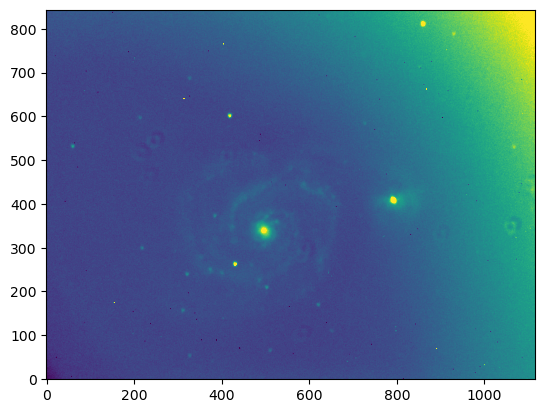

 75%|███████▌  | 3/4 [00:01<00:00,  2.27it/s]

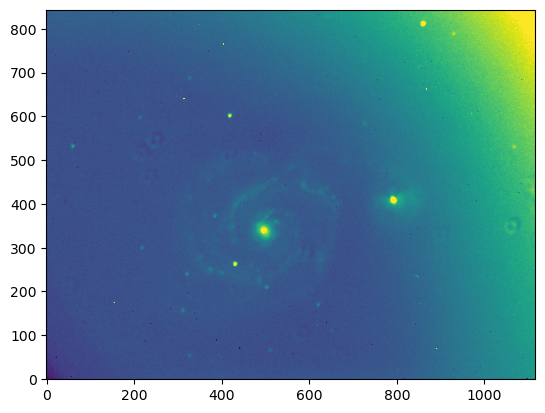

 75%|███████▌  | 3/4 [00:01<00:00,  1.96it/s]


MaxIterError: List of matching triangles exhausted before an acceptable transformation was found

In [77]:
registered_image_list = []
aligned_G = []
for file in tqdm(M20_calib['G']):
    plt.imshow(file, origin='lower', norm=ImageNormalize(file, ZScaleInterval()))
    plt.show()
    registered_image, footprint = aa.register(file, M20_calib['G'][0], detection_sigma=5, min_area=10)
    aligned_G.append(registered_image)
    # aligned_G.append(footprint)



In [78]:
aligned_R = []
for file in tqdm(M20_calib['R']):
    registered_image, footprint = aa.register(file, M20_calib['R'][0], detection_sigma=5, min_area=10)
    aligned_R.append(registered_image)
    # aligned_R.append(footprint)

100%|██████████| 5/5 [00:00<00:00,  5.81it/s]


In [504]:
aligned_S2 = []
for file in tqdm(M20_calib['S II']):
    registered_image, footprint = aa.register(file, M20_calib['S II'][0], detection_sigma=5, min_area=10)
    aligned_S2.append(registered_image)
    # aligned_S2.append(footprint)

KeyError: 'S II'

In [505]:
aligned_Ha = []
for file in tqdm(M20_calib['H-ALPHA']):
    registered_image, footprint = aa.register(file, M20_calib['H-ALPHA'][0], detection_sigma=5, min_area=10)
    aligned_Ha.append(registered_image)
    # aligned_Ha.append(footprint)

KeyError: 'H-ALPHA'

In [506]:
aligned_O3 = []
for file in tqdm(M20_calib['O III']):
    registered_image, footprint = aa.register(file, M20_calib['O III'][0], detection_sigma=5, min_area=10)
    aligned_O3.append(registered_image)
    # aligned_O3.append(footprint)

KeyError: 'O III'

In [80]:
aligned_I = []
for file in tqdm(M20_calib['I']):
    registered_image, footprint = aa.register(file, M20_calib['I'][0], detection_sigma=5, min_area=10)
    aligned_I.append(registered_image)
    # aligned_I.append(footprint)

100%|██████████| 5/5 [00:00<00:00,  6.13it/s]


In [79]:
aligned_B = []
for file in tqdm(M20_calib['B']):
    registered_image, footprint = aa.register(file, M20_calib['B'][0], detection_sigma=5, min_area=10)
    aligned_B.append(registered_image)
    # aligned_B.append(footprint)

 33%|███▎      | 1/3 [00:00<00:00,  4.76it/s]


MaxIterError: List of matching triangles exhausted before an acceptable transformation was found

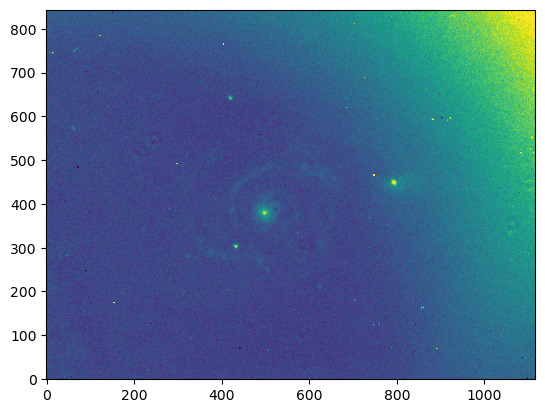

In [81]:
plt.imshow(np.median(aligned_B, axis=0), origin='lower', norm=ImageNormalize(np.median(aligned_B, axis=0), ZScaleInterval()))

In [20]:
for file in range(len(M20_files)):
    print(str(M20_files[file])[:-5]+'_'+str(fits.getheader(M20_files[file])['Filter'])+'.fits')
    fits.writeto(str(M20_files[file])[:-5]+'_'+str(fits.getheader(M20_files[file])['Filter'])+'.fits', fits.getdata(M20_files[file]), fits.getheader(M20_files[file]), overwrite=True)

/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0156_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0157_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0158_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0159_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0160_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0161_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0162_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0163_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0164_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0165_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20.2024-06-01.0166_reduced_G.fits
/Users/bencapistrant/RETRHO/2024-05-31/Reduced/M20/M20

In [5]:
M20_groups.keys()

dict_keys(['B', 'G', 'R'])

In [6]:
M20B = [fits.getdata(f) for f in M20_groups['B']]
M20R = [fits.getdata(f) for f in M20_groups['R']]
M20G = [fits.getdata(f) for f in M20_groups['G']]
# M20I = [fits.getdata(f) for f in M20_groups['I']]
# M20Ha = [fits.getdata(f) for f in M20_groups['H-ALPHA']]
# M20OIII = [fits.getdata(f) for f in M20_groups['O III']]
# M20SII = [fits.getdata(f) for f in M20_groups['S II']]

In [7]:
len(M20R)

10

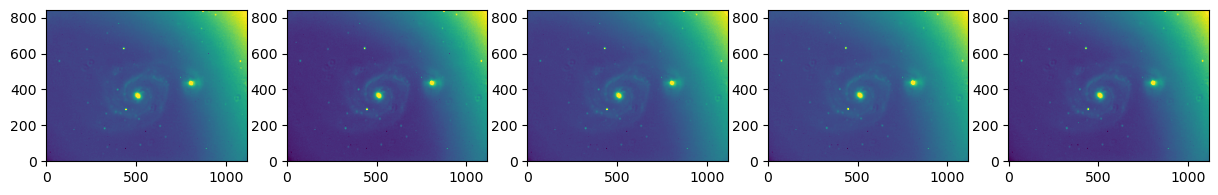

In [82]:
plt.figure(figsize=(15,15))
for i in range(len(M20_calib['R'])):
    ax = plt.subplot(3,5,i+1)
    ax.imshow(M20_calib['R'][i], origin='lower',norm=ImageNormalize(M20_calib['R'][i], interval=ZScaleInterval()))

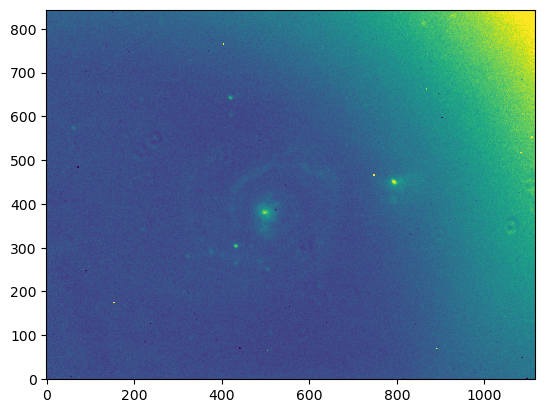

In [83]:
plt.imshow(np.median(M20_calib['B'], axis=0), origin='lower',norm=ImageNormalize(np.median(M20_calib['B'], axis=0), interval=ZScaleInterval()))

In [84]:
# M20B_median = np.median(M20B, axis=0)
M20B_median = np.median(M20_calib['B'], axis=0)
M20R_median = np.median(aligned_R, axis=0)
M20G_median = np.median(aligned_G, axis=0)
M20I_median = np.median(aligned_I, axis=0)
# M20Ha_median = np.median(aligned_Ha, axis=0)
# M20OIII_median = np.median(aligned_O3, axis=0)
# M20SII_median = np.median(aligned_S2, axis=0)
# median_ims = [M20R_median, M20G_median, M20I_median, M20Ha_median, M20OIII_median, M20SII_median]
median_ims = [M20I_median,M20R_median, M20G_median,M20B_median]

In [85]:
aligned_ims = []
for i in tqdm(median_ims):
    registered_image, footprint = aa.register(i, median_ims[0], detection_sigma=5, min_area=10)
    aligned_ims.append(registered_image)
# for file in tqdm(M20_calib['I']):
    # registered_image, footprint = aa.register(file, M20_calib['I'][0], detection_sigma=5, min_area=10)
    # aligned_I.append(registered_image)

 75%|███████▌  | 3/4 [00:00<00:00,  4.32it/s]


MaxIterError: List of matching triangles exhausted before an acceptable transformation was found

In [86]:
aligned_ims.append(median_ims[-1])

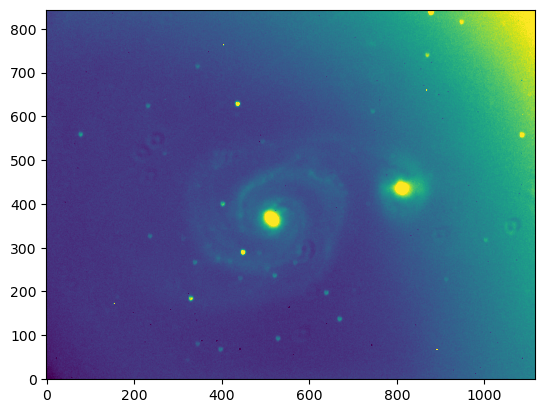

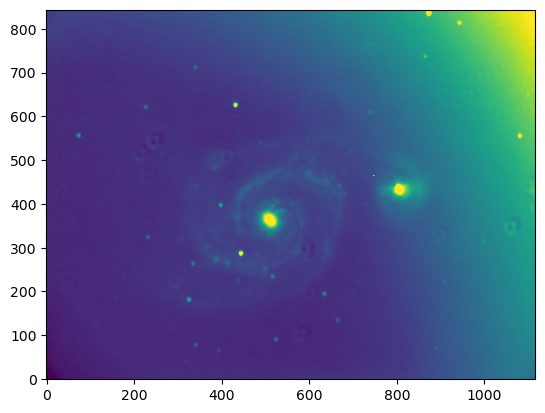

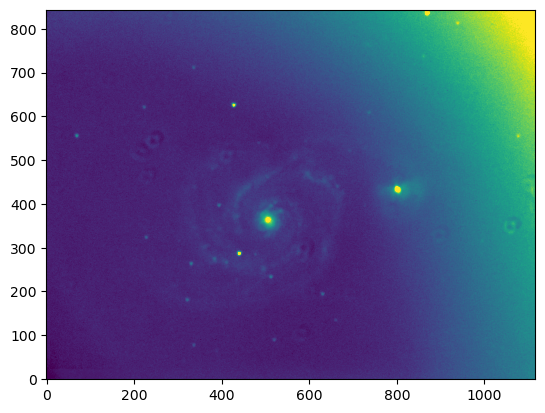

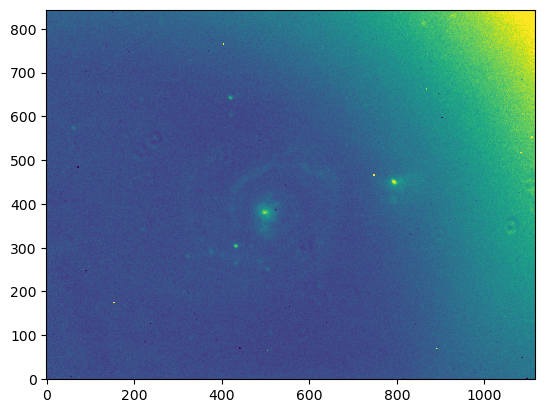

In [87]:
for i in range(len(median_ims)):
    plt.imshow(median_ims[i], origin='lower',norm=ImageNormalize(median_ims[i], interval=ZScaleInterval()))
    plt.show()

In [ ]:
[M20R_median, M20G_median, M20I_median, M20Ha_median, M20OIII_median, M20SII_median]

In [88]:
# labels = ['R', 'G', 'I', 'Ha', 'OIII', 'SII']
labels = ['I', 'R', 'G', 'B']
for i in range(len(aligned_ims)):
    fits.writeto(str(path)+'manual_reduced/M51_'+labels[i]+'.fits', aligned_ims[i], overwrite=True)

In [202]:
red = aligned_ims[2]
green = aligned_ims[0]
blue = aligned_ims[1]

# red = M20Ha_median
# green = M20SII_median
# blue = M20OIII_median

# red, green, blue = median_ims

In [197]:
# plt.hist(M20R_median.ravel(), bins=100, log=True);
# plt.xlim(0,1000)

In [198]:
# plt.hist(M20G_median.ravel(), bins=50, log=True);

In [199]:
# plt.hist(M20B_median.ravel(), bins=50, log=True);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


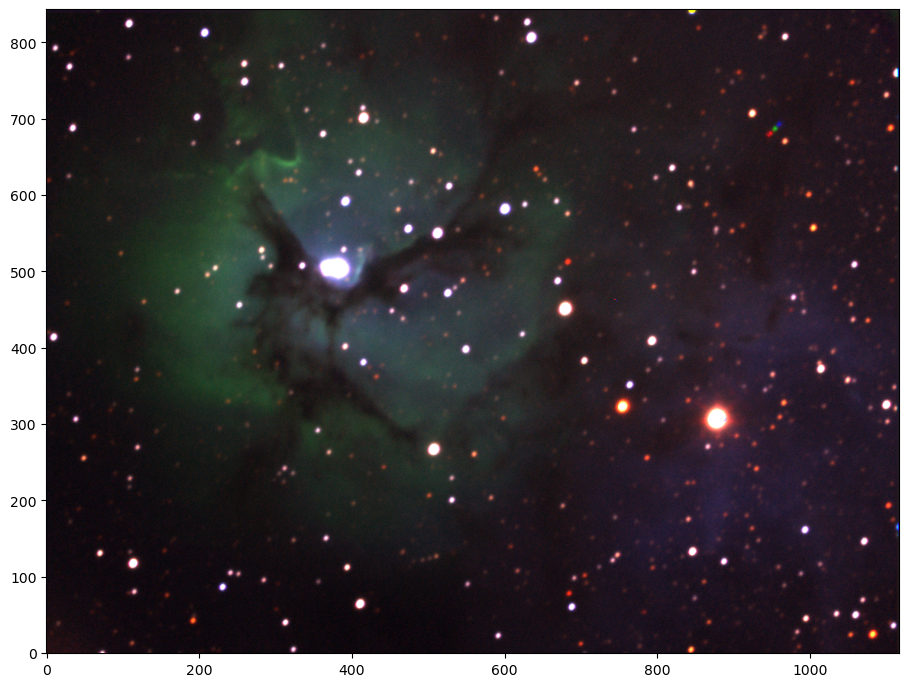

In [208]:
red_norm = ImageNormalize(red, interval=ZScaleInterval())
green_norm = ImageNormalize(green, interval=ZScaleInterval())
blue_norm = ImageNormalize(blue, interval=ZScaleInterval())

min_c = 0.01
max_c  = 99.5


plt.figure(figsize=(11,11))
rgb = np.dstack([(red-red_norm.vmin)/(red_norm.vmax-red_norm.vmin), (green-green_norm.vmin)/(green_norm.vmax-green_norm.vmin), (blue-blue_norm.vmin)/(blue_norm.vmax-blue_norm.vmin)])
rgb = (rgb-np.nanpercentile(rgb, min_c))/(np.nanpercentile(rgb, max_c)-np.nanpercentile(rgb, min_c))
# rgb/=np.max(rgb)
# rgb/=(np.max(rgb)-np.min(rgb))
plt.imshow(rgb, origin='lower')
plt.show()

In [43]:
rgb.shape

(844, 1117, 3)

In [48]:
median_ims = [np.roll(M20R_median, -1, axis=0), M20G_median, np.roll(np.roll(M20B_median, -2, axis=1),-1,axis=0)]

In [108]:
labels = ['R', 'G', 'B']
for i in range(len(median_ims)):
    # plt.imshow(median_ims[i], origin='lower',norm=ImageNormalize(median_ims[i], interval=ZScaleInterval()))
    # plt.show()
    fits.writeto(path+labels[i]+'.fits', median_ims[i], overwrite=True)

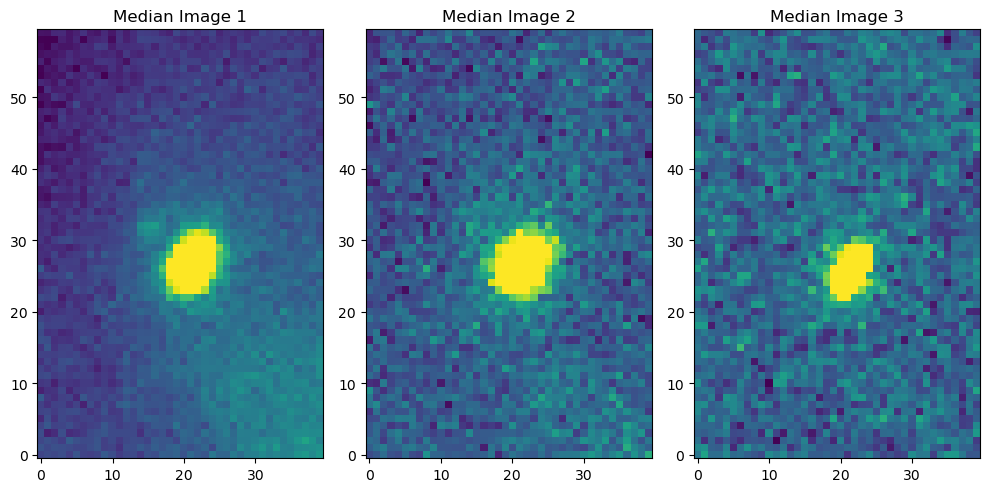

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


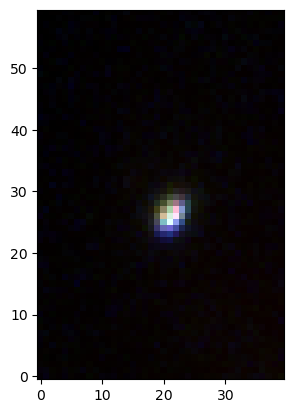

In [49]:
plt.figure(figsize=(10, 5))
cutouts = []
for i, median_image in enumerate(median_ims):
    ax = plt.subplot(1, len(median_ims), i + 1)
    cutout = median_image[640:700, 300:340]
    ax.imshow(cutout, origin='lower', norm=ImageNormalize(cutout, interval=ZScaleInterval()))
    ax.set_title(f"Median Image {i+1}")
    cutouts.append(cutout/np.max(cutout))
plt.tight_layout()
plt.show()
rgb_cutout = np.dstack(cutouts)
plt.imshow(rgb_cutout, origin='lower',norm=ImageNormalize(rgb_cutout, interval=ZScaleInterval()))

In [37]:
cutouts

[array([[184.18646379, 186.40522009, 206.98081957, ..., 398.45902379,
         396.25534258, 421.47742216],
        [161.17686704, 180.91762493, 169.48817682, ..., 437.80397668,
         380.53791274, 429.5064998 ],
        [201.2804845 , 169.98162611, 190.74859171, ..., 390.24010051,
         397.98688158, 408.60951176],
        ...,
        [ 25.6276699 ,  40.68302476,  35.52821965, ..., 154.20430279,
          76.21778622, 115.72864037],
        [  7.45970709, -25.22511283,  54.972913  , ..., 131.2910227 ,
          85.19833663, 148.57867578],
        [ -6.4911032 ,  -8.79629296, -13.18417478, ..., 118.72225796,
         111.2535594 ,  96.19576078]]),
 array([[  1.51952886,  16.03481374,  42.22639133, ...,  93.28110735,
          51.89871136, 133.19052998],
        [ 23.3040821 ,  46.78452031,  63.46899388, ...,  76.0614384 ,
          53.10676301,  26.67289008],
        [ 41.79184203,  33.69886816, -17.28440878, ...,  48.77656274,
           9.33353868,  55.65096132],
        ...,


In [79]:
print(green_norm.vmin, green_norm.vmax)
print(red_norm.vmin, red_norm.vmax)
print(blue_norm.vmin, blue_norm.vmax)

-90.29319915778143 579.9245043598262
-116.81672142517374 1083.171873341503
-50.90349820514918 140.10554524299835


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


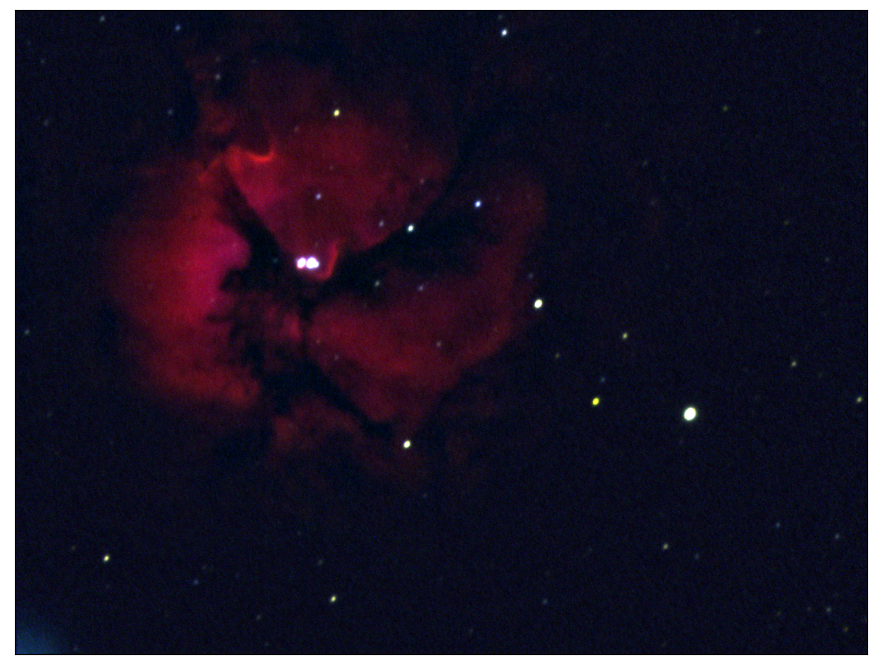

In [119]:
# rgb_image = np.array([red,green,blue]).T.swapaxes(0,1)

rgb_image = np.dstack([red,green,blue])

# r = np.roll(np.roll(red, -110, axis=0), -50, axis=1)
# g = green 
# b = np.roll(np.roll(blue, 115, axis=0), 55, axis=1)
# rgb_image = np.dstack([r,g,b])
# rgb_image = np.dstack([red-np.median(red),green-np.median(green),blue-np.median(blue)])
# redlog = np.log10(red)
# greenlog = np.log10(green)
# bluelog = np.log10(blue)
# rgb_image = rgb_image[500:2600,250:4000]
# rgb_image = np.dstack([red+np.abs(red.min()),green+np.abs(green.min()),blue+np.abs(blue.min())])

# rgb_image = np.dstack([redlog,greenlog,bluelog])
# rgb_image = (rgb_image - np.nanpercentile(rgb_image, 1, axis=(0,1)))
# rgb_image = np.log10(rgb_image)
# rgb_image[np.isnan(rgb_image)] = 0
# rgb_image /= np.nanpercentile(rgb_image, 98.5)


min_c = 3
max_c = 99.94

rgb_image = (rgb_image-np.nanpercentile(rgb_image, min_c,axis=(0,1)))/(np.nanpercentile(rgb_image, max_c,axis=(0,1))-np.nanpercentile(rgb_image, min_c,axis=(0,1)))
plt.figure(figsize=(11,11))
plt.imshow(rgb_image, origin='lower')
# plt.savefig('Horsehead.png',dpi=300)
plt.xticks([]); plt.yticks([]);

In [80]:
for i in range(len(median_ims)):
    fits.writeto(path+'M20_'+str(list(M20_groups.keys())[i])+'.fits', median_ims[i], fits.getheader(M20_groups[list(M20_groups.keys())[i]][0]), overwrite=True)